In [34]:
import pandas as pd
import math

In [35]:
with open('DATA.TXT') as f:
    lines = f.readlines()

In [36]:
df=pd.DataFrame(columns=["Trend_in_deg","Plunge_in_deg"])
error_line_file = open("lines of error.txt", "w")  # Open a file

In [37]:
count=0
for line in lines:
    count+=1
    try:
        first=line.index("=")
        second=first+1+line[first+1:].index("=")
        Trend=float(line[first+1:first+line[first:].index("d")])
        Plunge=float(line[second+1:second+line[second:].index("d")])
        # adding values to df
        df.loc[len(df.index)]=[Trend,Plunge]
    except:
        error_line_file.write("error at line no.: "+str(count))
        df.loc[len(df.index)]=[df.loc[len(df.index)-1]["Trend_in_deg"],df.loc[len(df.index)-1]["Plunge_in_deg"]]
error_line_file.close()

In [38]:
df.to_csv("trend_plunge.csv",index=False)

# Calculation for desired value

In [39]:
data = pd.read_csv("trend_plunge.csv") 

In [40]:
#assumption   all units are in SI
drilling_rate=-3    # m/s
data_print_rate=1   # in sec

In [41]:
#x,y,z position of the drill bit    where  y is north, x is east and z is zenith
df_pos=pd.DataFrame(columns=["Time","x","y","z"])     

In [42]:
#calculation part
real_x=0     # east
real_y=0     # north 
real_z=0     # zenith
count=1
for i in data.itertuples():
    temp_trend=i[1]
    temp_plunge=i[2]
    Time=count*data_print_rate
    drill_advance=drilling_rate*data_print_rate    #in m
    real_x+=drill_advance*math.cos(math.radians(temp_plunge))*math.sin(math.radians(temp_trend))
    real_y+=drill_advance*math.cos(math.radians(temp_plunge))*math.cos(math.radians(temp_trend))
    real_z+=drill_advance*math.sin(math.radians(temp_plunge))
    df_pos.loc[len(df_pos.index)]=[Time,real_x,real_y,real_z]
    count+=1

In [43]:
df_pos.to_csv("Time_pos.csv",index=False)

# Data visualisation

In [44]:
x_y_z = pd.read_csv("Time_pos.csv") 

In [45]:
len(x_y_z)

1394

In [46]:
# import the module  for 3D with mouse control
from vpython import *

In [47]:
scene_3 = canvas(autoscale=True)
pointer_x = arrow(pos=vector(0,0,0),axis=vector(2500,0,0),shaftwidth=5,color=color.red)
pointer_y= arrow(pos=vector(0,0,0),axis=vector(0,2500,0),shaftwidth=5,color=color.green)
pointer_z= arrow(pos=vector(0,0,0),axis=vector(0,0,2500),shaftwidth=5,color=vector(0,0,1))
drill=sphere(pos=vector(0,0,0),radius=2.5,color=color.green,make_trail=True)

for i in x_y_z.itertuples():
    rate(30) # limit animation rate, render scene
    if i[0]+3<len(x_y_z):
        drill.pos=vector(i[2],i[3],i[4])

<IPython.core.display.Javascript object>

In [48]:
print(i[2],i[3],i[4])

-779.024945131042 -1260.807645912248 -2791.114890679896


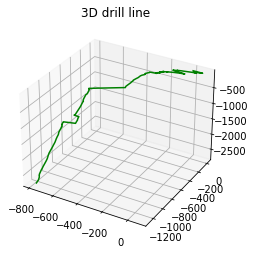

In [49]:
# importing mplot3d toolkits, numpy and matplotlib    for 3D without mouse control
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = np.array(x_y_z["z"])
x = np.array(x_y_z["x"])
y = np.array(x_y_z["y"])
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D drill line')
plt.show()

# rough code

In [50]:
#equal to indexs  with trend and plunge
print(line)
first=line.index("=")
second=first+1+line[first+1:].index("=")
Trend=float(line[first+1:first+line[first:].index("d")])
third=second+1+line[second+1:].index("=")
Plunge=float(line[second+1:second+line[second:].index("d")])
print(first,second,third)
print(Trend,Plunge)

Trend = 20.18 degrees from North in Clockwise direction Plunge = 71.58degrees  A= 68Â° | ENE

6 63 80
20.18 71.58


In [51]:
math.cos(math.radians(60))

0.5000000000000001

In [52]:
np.array(x_y_z["z"])

array([-5.13101781e-02, -1.17801778e-01, -1.79058577e-01, ...,
       -2.78543980e+03, -2.78826859e+03, -2.79111489e+03])